In [1]:
pip install selenium webdriver-manager

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.5 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.5 MB 5.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.5 MB 5.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.5 MB 5.0 MB/s eta 0:00:01
   ----------------------- ---------------- 5.5/9.5 MB 4.7 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.5 MB 4.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.5 MB 4.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.5 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 8.4/9.5 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 4.2 MB/s eta 0:00:00
Note: you may need 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of YC startups
url = "https://www.ycombinator.com/companies/"

# Fetch the webpage
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36"}
response = requests.get(url, headers=headers)

# Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Find all startup cards (adjust this based on inspection)
startup_cards = soup.find_all("div", class_="_company_1pgsr_355")

# Extract startup details
data = []
for card in startup_cards:
    name = card.find("h2").text.strip() if card.find("h2") else "N/A"
    desc = card.find("p").text.strip() if card.find("p") else "N/A"
    data.append([name, desc])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Startup Name", "Description"])

# Save to CSV
df.to_csv("yc_startups.csv", index=False)

print("Scraping complete! Data saved to yc_startups.csv")


ModuleNotFoundError: No module named 'pandas'

In [4]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 5.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.5 MB 5.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.5 MB 5.8 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 5.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.5 MB 5.2 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.5 MB 4.9 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 4.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.5 MB 4.9 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.1 MB/s eta 0:00:00
   


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set up Chrome options
chrome_options = Options()
# REMOVE this line: chrome_options.add_argument("--headless")  
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Start Selenium WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Load the Y Combinator companies page
url = "https://www.ycombinator.com/companies/"
driver.get(url)

# Wait for JavaScript to load
time.sleep(10)

# Scroll down to load more content
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)

# Get the page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()  # Close browser

# Extract startup details
startup_cards = soup.find_all("div", class_="relative flex w-full items-center justify-start")

data = []
for card in startup_cards:
    name_tag = card.find("span", class_="_coName_1pgsr_470")  # Startup Name
    tags = card.find_all("span", class_="pill _pill_1pgsr_33")  # All tags (batch + industry)

    name = name_tag.text.strip() if name_tag else "N/A"

    # Extract only industry tags (ignore batch names like "S12", "W23", "F11")
    industry_tags = [tag.text.strip() for tag in tags if not (len(tag.text.strip()) >= 3 and tag.text.strip()[1:].isdigit())]

    # Convert list to a comma-separated string
    desc = ", ".join(industry_tags) if industry_tags else "N/A"

    data.append([name, desc])  # Store extracted text

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Startup Name", "Description"])
df.to_csv("yc_startups.csv", index=False)

print(f"Scraping complete! {len(df)} startups saved to yc_startups.csv")


Scraping complete! 60 startups saved to yc_startups.csv


In [40]:
import pandas as pd

df = pd.read_csv("yc_startups.csv")  # Load the file
print(df.head())  # Print the first 5 rows

  Startup Name                            Description
0       Airbnb  Consumer, Travel, Leisure and Tourism
1    Amplitude                         B2B, Analytics
2     Coinbase          Fintech, Banking and Exchange
3     DoorDash            Consumer, Food and Beverage
4      Dropbox                      B2B, Productivity


In [42]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.1 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.0 MB 1.0 MB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.0 MB 1.1 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.0 MB 1.2 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.0 MB 1.1 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.0 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.0 MB 1.0 MB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.0 MB 1.0 MB/s eta 0:00:07
   ---------- ----------------------------- 2.1/8.0 MB 986.3 kB/s eta 0:00:07
   ----------- ---------------------------- 2.4/8.0 MB 961.4 kB/s eta 0:00:06
   ------------- ------------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


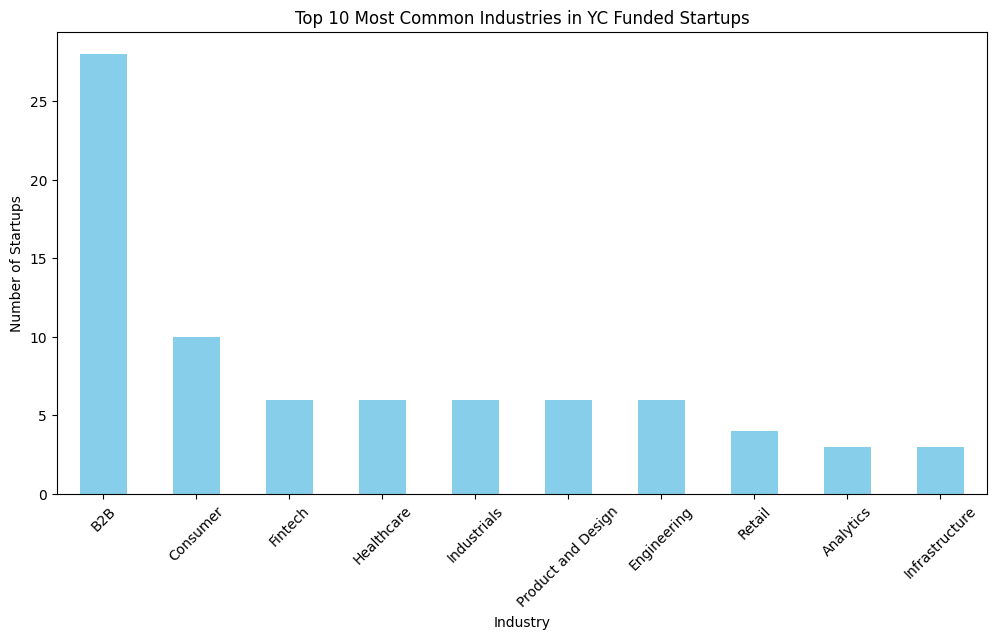

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("yc_startups.csv")

# Count occurrences of each industry
industry_counts = df["Description"].str.split(", ").explode().value_counts()

# Plot industry distribution
plt.figure(figsize=(12,6))
industry_counts.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Industries in YC Funded Startups")
plt.xlabel("Industry")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.show()


In [47]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


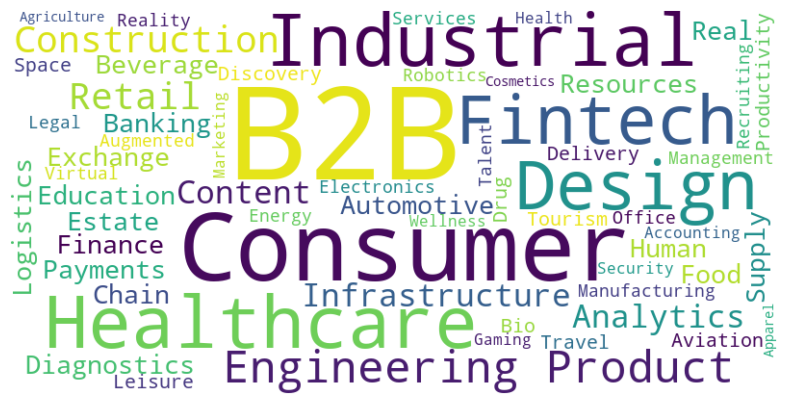

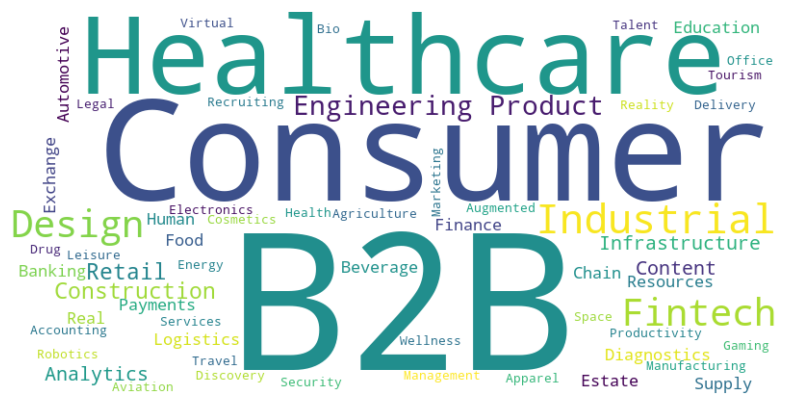

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["Description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["Description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Start Selenium WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Load the Y Combinator companies page
url = "https://www.ycombinator.com/companies/"
driver.get(url)

# Wait for JavaScript to load
time.sleep(10)

# # Scroll down to load more content
# driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
# time.sleep(5)
# Scroll multiple times to ensure more content loads
for _ in range(10):  # Scroll 5 times
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)  # Allow new data to load


# Get the page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()  # Close browser

# Extract startup details
startup_cards = soup.find_all("div", class_="relative flex w-full items-center justify-start")

data = []
for card in startup_cards:
    name_tag = card.find("span", class_="_coName_1pgsr_470")  # Startup Name
    desc_tag = card.find("span", class_="_coDescription_1pgsr_495")  # Corrected class for Description
    # website_tag = card.find("a", class_="_company_1pgsr_355")  # Corrected class for Website
    tags = card.find_all("span", class_="pill _pill_1pgsr_33")  # All tags (batch + industry)
    
    name = name_tag.text.strip() if name_tag else "N/A"
    description = desc_tag.text.strip() if desc_tag else "N/A"
    # website = website_tag["href"] if website_tag else "N/A"
    website = url + name.replace(" ", "-")
    # Extract batch separately (e.g., S12, W23)
    batch = next((tag.text.strip() for tag in tags if len(tag.text.strip()) >= 3 and tag.text.strip()[1:].isdigit()), "N/A")

    # Extract only industry tags (ignoring batch)
    industry_tags = [tag.text.strip() for tag in tags if tag.text.strip() != batch]

    industries = ", ".join(industry_tags) if industry_tags else "N/A"

    data.append([name, description, industries, batch, website])  # Store extracted text

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Startup Name", "Description", "Industries", "Batch", "Website"])
df.to_csv("yc_startups.csv", index=False)

print(f"Scraping complete! {len(df)} startups saved to yc_startups.csv")


Scraping complete! 240 startups saved to yc_startups.csv


In [8]:
import pandas as pd

df = pd.read_csv("yc_startups.csv")  # Load the file
print(df.head())  # Print the first 5 rows

  Startup Name                              Description  \
0       Airbnb    Book accommodations around the world.   
1    Amplitude               Digital Analytics Platform   
2     Coinbase  Buy, sell, and manage cryptocurrencies.   
3     DoorDash                     Restaurant delivery.   
4      Dropbox     Backup and share files in the cloud.   

                              Industries Batch  \
0  Consumer, Travel, Leisure and Tourism   W09   
1                         B2B, Analytics   W12   
2          Fintech, Banking and Exchange   S12   
3            Consumer, Food and Beverage   S13   
4                      B2B, Productivity   S07   

                                           Website  
0     https://www.ycombinator.com/companies/Airbnb  
1  https://www.ycombinator.com/companies/Amplitude  
2   https://www.ycombinator.com/companies/Coinbase  
3   https://www.ycombinator.com/companies/DoorDash  
4    https://www.ycombinator.com/companies/Dropbox  


In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Start Selenium WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Load the Y Combinator companies page
url = "https://www.ycombinator.com/companies/"
driver.get(url)

# Wait for JavaScript to load
time.sleep(10)

# # Scroll down to load more content
# driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
# time.sleep(5)
# Scroll multiple times to ensure more content loads
for _ in range(10):  # Scroll 5 times
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)  # Allow new data to load


# Get the page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()  # Close browser

# Extract startup details
startup_cards = soup.find_all("div", class_="relative flex w-full items-center justify-start")

data = []
for card in startup_cards:
    name_tag = card.find("span", class_="_coName_1pgsr_470")  # Startup Name
    desc_tag = card.find("span", class_="_coDescription_1pgsr_495")  # Corrected class for Description
    # website_tag = card.find("a", class_="_company_1pgsr_355")  # Corrected class for Website
    tags = card.find_all("span", class_="pill _pill_1pgsr_33")  # All tags (batch + industry)
    
    name = name_tag.text.strip() if name_tag else "N/A"
    description = desc_tag.text.strip() if desc_tag else "N/A"
    # website = website_tag["href"] if website_tag else "N/A"
    website = url + name.replace(" ", "-")
    # Extract batch separately (e.g., S12, W23)
    batch = next((tag.text.strip() for tag in tags if len(tag.text.strip()) >= 3 and tag.text.strip()[1:].isdigit()), "N/A")

    # Extract only industry tags (ignoring batch)
    industry_tags = [tag.text.strip() for tag in tags if tag.text.strip() != batch]

    industries = ", ".join(industry_tags) if industry_tags else "N/A"

    company_url = website
    driver.get(company_url)
    # Wait for JavaScript to load
    time.sleep(10)

    # # Scroll down to load more content
    # driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # time.sleep(5)
    # Scroll multiple times to ensure more content loads
    for _ in range(2):  # Scroll 5 times
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(5)

    soup2 = BeautifulSoup(driver.page_source, "html.parser")
    driver.quit()  # Close browser

    founded_year = soup2.find("div", class_="flex flex-row justify-between")

    data.append([name, description, industries, batch, website, founded_year])  # Store extracted text

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Startup Name", "Description", "Industries", "Batch", "Website", "Founded"])
df.to_csv("yc_startups.csv", index=False)

print(f"Scraping complete! {len(df)} startups saved to yc_startups.csv")


MaxRetryError: HTTPConnectionPool(host='localhost', port=51403): Max retries exceeded with url: /session/cd6c86841f263b69e7fb16285414b55e/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002A3D0FC3790>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
""